In [2]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# Carregando o conjunto de dados
 # Link para o conjunto de dados
df = pd.read_csv('heart.csv')

In [4]:
# Visualizando as primeiras linhas do conjunto de dados
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [5]:
# Verificando informações sobre os dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [6]:
# Verificando a presença de valores ausentes
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
# Coluna alvo: TARGET -> Indicador da presença de doenças cardíacas (0 = não, 1 = sim).

df['target'].unique()

array([1, 0])

In [8]:
# Separando características e rótulos
# Coluna alvo: TARGET -> Indicador da presença de doenças cardíacas (0 = não, 1 = sim).
X = df.drop('target', axis=1)  # Características (features)
y = df['target']               # Rótulo (target)

In [9]:
# Dividindo os dados em conjuntos de treinamento e teste
# 20% usado para teste e 80% restante para treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Padronizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Treinando o modelo com Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Verificando a Acurácia

In [13]:
# Avaliando o modelo
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAcurácia do Modelo: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Confusion Matrix:
 [[24  5]
 [ 5 27]]

Acurácia do Modelo: 83.61%


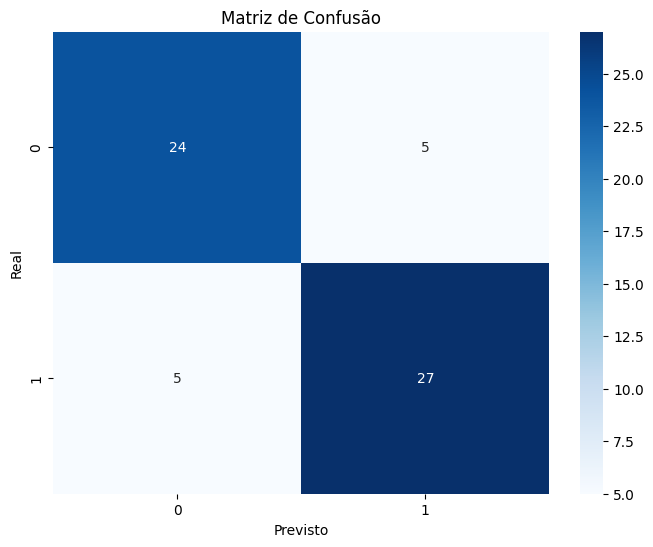

In [14]:
# Visualizando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# Testando outro modelo: Recall


Ele identifica se meu modelo ele está deixando passar muitos casos positivos

In [15]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.84375


# Testando com o modelo de Precisão

In [16]:
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [17]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Inicializando o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [19]:
# Treinando o modelo com os dados de treino
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [20]:
# Fazendo previsões com os dados de teste
y_pred = rf_model.predict(X_test)


In [21]:
# Calculando a precisão
precision = precision_score(y_test, y_pred)


In [22]:
print(f"Precisão do modelo: {precision:.4f}")

Precisão do modelo: 0.8438
